<a href="https://colab.research.google.com/github/121deepti/Zomato/blob/main/Zomato_Restaurant_Clustering_and_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Zomato Restaurant Clustering and Sentiment Analysis



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import missingno as msno

!pip install wordcloud
from wordcloud import WordCloud

from scipy.stats import norm

import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords
#for tokenization
from nltk.tokenize import word_tokenize
# for POS tagging(Part of speech in NLP sentiment analysis)
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

### Dataset Loading

In [2]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
hotel_df=pd.read_csv("/content/drive/MyDrive/my_data/Zomato Restaurant names and Metadata.csv")
review_df=pd.read_csv("/content/drive/MyDrive/my_data/Zomato Restaurant reviews.csv")

### Dataset First View

In [4]:
# Restaurant Dataset First Look
hotel_df.sample(5)

,Name,Links,Cost,Collections,Cuisines,Timings
29,Hunger Maggi Point,https://www.zomato.com/hyderabad/hunger-maggi-...,200,NaN,Fast Food,4:30 PM to 5:30 AM
39,Deli 9 Bistro,https://www.zomato.com/hyderabad/deli-9-bistro...,700,NaN,"Cafe, Continental, Desserts",12 Noon to 10:30 PM
92,Collage - Hyatt Hyderabad Gachibowli,https://www.zomato.com/hyderabad/collage-hyatt...,"2,800",Sunday Brunches,"Continental, Italian, North Indian, Chinese, A...",24 Hours (Mon-Sun)
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
64,Hyderabad Chefs,https://www.zomato.com/hyderabad/hyderabad-che...,600,NaN,"North Indian, Chinese",12 Noon to 10:30 PM


In [5]:
# Review Dataset First Look
review_df.sample(5)

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
8738,American Wild Wings,Debomita Sandhya,would rate this place 3.5\nThe food is good no...,3,"4 Reviews , 2 Followers",3/14/2019 23:07,0
419,Over The Moon Brew Company,Sheela Ippili,I have been here quite a few times now. This p...,5,"2 Reviews , 2 Followers",5/18/2019 22:59,0
5888,Tempteys,Kriti,The Oreo shake was a bit of a disappointment b...,4,"3 Reviews , 2 Followers",6/28/2018 1:24,0
634,eat.fit,Swathi Y P B,Delivery boy was reluctant to the deliver the ...,1,"1 Review , 4 Followers",4/8/2019 19:50,0
1019,Sardarji's Chaats & More,Ritika Shrivastava,Amazing chaat and street food just like back i...,4,"33 Reviews , 145 Followers",3/14/2019 20:41,0


### Dataset Rows & Columns count

In [6]:
# Restaurant Dataset Rows & Columns count
hotel_df.shape

(105, 6)

In [7]:
# Reviews Dataset Rows & Columns count
review_df.shape

(10000, 7)

### Dataset Information

In [8]:
# Restaurant Dataset Info
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


In [9]:
# Reviews Dataset Reviews info
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


#### Duplicate Values

In [10]:
# Hotel Dataset Duplicate Value Count
hotel_df.duplicated().sum()

0

In [11]:
# Reviews Dataset Duplicate Value Count
review_df.duplicated().sum()

36

In [12]:
#Duplicates records of Reviews Dataset
review_df[review_df.duplicated()]

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
8778,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8779,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8780,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8781,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8782,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8783,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8784,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8785,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8786,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8787,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0


In [13]:
#Removing Duplicates from Review Dataset
review_df=review_df.drop_duplicates()
review_df.duplicated().sum()

0

#### Missing Values/Null Values

In [14]:
# Missing Values/Null Values Count of Restaurant dataset
hotel_df.isna().sum()

Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

In [15]:
# Missing Values/Null Values Count of User Review dataset
review_df.isna().sum()

Restaurant    0
Reviewer      2
Review        9
Rating        2
Metadata      2
Time          2
Pictures      0
dtype: int64

<Axes: >

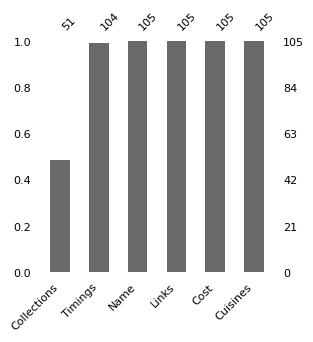

In [16]:
# Visualizing the missing values of Restaurant dataset
msno.bar(df=hotel_df,sort='ascending',figsize=(3,3),fontsize=8)

<Axes: >

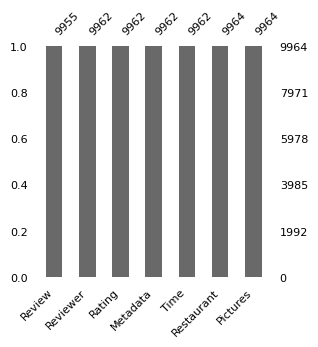

In [17]:
# Visualizing the missing values of Review dataset
msno.bar(df=review_df,sort='ascending',figsize=(3,3),fontsize=8)

### What did you know about your dataset?

**Restaurant DataSet**

There are 105 total observation with 6 different features.
Feature like timing has 1 but collection has more than 50% null values.
There is no duplicate values i.e., 105 unique data.
Feature cost represent amount but has object data type because these values are separated by comma ','.
Timing represent operational hour but as it is represented in the form of text has object data type.

**Review DataSet**

There are total 10000 observation and 7 features.
Except picture and restaurant feature all others have null values.
There are total of 36 duplicate values for two restaurant - American Wild Wings and Arena Eleven, where all these duplicate values generally have null values that's why i have removed those duplicate records.
Rating represent ordinal data, has object data type should be integer.
Timing represent the time when review was posted but show object data type, it should be converted into date time.


## ***2. Understanding Your Variables***

In [18]:
# Restaurant Dataset Columns
hotel_df.columns

Index(['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings'], dtype='object')

In [19]:
# Review Dataset Columns
review_df.columns

Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures'],
      dtype='object')

In [20]:
# Restaurant Dataset Describe
hotel_df.describe(include='all')

,Name,Links,Cost,Collections,Cuisines,Timings
count,105,105,105,51,105,104
unique,105,105,29,42,92,77
top,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,500,Food Hygiene Rated Restaurants in Hyderabad,"North Indian, Chinese",11 AM to 11 PM
freq,1,1,13,4,4,6


In [21]:
# Review Dataset Describe
review_df.describe(include='all')

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
count,9964,9962,9955,9962,9962,9962,9964.000000
unique,100,7446,9364,10,2477,9782,NaN
top,Beyond Flavours,Parijat Ray,good,5,1 Review,7/29/2018 20:34,NaN
freq,100,13,237,3832,919,3,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,0.751305
std,NaN,NaN,NaN,NaN,NaN,NaN,2.574626
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000


### Variables Description

**Zomato Restaurant**

Name : Name of Restaurant

Links : URL Links of Restaurants

Cost : Per person estimated Cost of dining

Collection : Tagging of Restaurants w.r.t. Zomato categories

Cuisines : Cuisines served by Restaurants

Timings : Restaurant Timings


**Zomato Restaurant Reviews**


Restaurant : Name of the Restaurant

Reviewer : Name of the Reviewer

Review : Review Text

Rating : Rating Provided by Reviewer

MetaData : Reviewer Metadata - No. of Reviews and followers

Time: Date and Time of Review

Pictures : No. of pictures posted with review

### Check Unique Values for each variable.

In [22]:
# Check Unique Values for each variable of Zomato dataset.
for i in hotel_df.columns:
  col=hotel_df[i]
  print("Number of Unique values in",i,"is:",col.nunique())

Number of Unique values in Name is: 105
Number of Unique values in Links is: 105
Number of Unique values in Cost is: 29
Number of Unique values in Collections is: 42
Number of Unique values in Cuisines is: 92
Number of Unique values in Timings is: 77


In [23]:
# Check Unique Values for each variable of Zomato Reviews dataset.
for i in review_df.columns:
  col=review_df[i]
  print("Number of Unique values in",i,"is:",col.nunique())

Number of Unique values in Restaurant is: 100
Number of Unique values in Reviewer is: 7446
Number of Unique values in Review is: 9364
Number of Unique values in Rating is: 10
Number of Unique values in Metadata is: 2477
Number of Unique values in Time is: 9782
Number of Unique values in Pictures is: 36


## 3. ***Data Wrangling***

### Data Wrangling Code

In [24]:
# Write your code to make your dataset analysis ready.
#Creating copies of datasets for performing eda
hotel_cpy=hotel_df.copy()
review_cpy=review_df.copy()

In [25]:
# Remove commas from the 'Cost' column and convert it to numeric
hotel_cpy['Cost'] = hotel_cpy['Cost'].str.replace(',', '').astype(int)
#Creating bins of cost column and categorize cost column
hotel_cpy['Cost_bins']=pd.cut(hotel_cpy['Cost'],bins=[100,500,1000,2000,3000])
print('[Cost per person][Number of Restaurants]')
hotel_cpy['Cost_bins'].value_counts()

[Cost per person][Number of Restaurants]


(500, 1000]     40
(100, 500]      33
(1000, 2000]    30
(2000, 3000]     2
Name: Cost_bins, dtype: int64

In [26]:
#top 5 costlier restaurant
hotel_cpy.sort_values('Cost', ascending = False)[['Name','Cost']][:5]

,Name,Cost
92,Collage - Hyatt Hyderabad Gachibowli,2800
56,Feast - Sheraton Hyderabad Hotel,2500
21,Jonathan's Kitchen - Holiday Inn Express & Suites,1900
18,10 Downing Street,1900
91,Cascade - Radisson Hyderabad Hitec City,1800


In [27]:
#top 5 economical restaurant
hotel_cpy.sort_values('Cost')[['Name','Cost']][:5]

,Name,Cost
89,Mohammedia Shawarma,150
23,Amul,150
54,Asian Meal Box,200
101,Sweet Basket,200
59,KS Bakers,200


In [28]:
# spliting the Collections after removing Nulls and storing unique collection in dictionary
Collections_Values=hotel_cpy['Collections'].dropna().str.split(', ')
Collections_Values_set=set(Collections_Values.explode())
collection_dict=dict.fromkeys(Collections_Values_set,0)

In [29]:
# Updating Collection dictionary with each collection value
def collection(tag):
  tag_list=tag.split(', ')
  for t in tag_list:
    if t in collection_dict:
      collection_dict[t]+=1

In [30]:
print(collection_dict)

{'Best Milkshakes': 0, 'The ‘Must Visit’ Eateries': 0, 'Best Bars & Pubs': 0, 'Street Food': 0, 'Barbecue & Grill': 0, 'Haleem': 0, 'Great Buffets': 0, 'Top-Rated': 0, 'Brilliant Biryanis': 0, 'Terrific Thalis': 0, 'Live Sports Screenings': 0, 'Happy Hours': 0, 'Gigs and Events': 0, 'Corporate Favorites': 0, 'Great Italian': 0, 'Pan-Asian Delicacies': 0, 'Veggie Friendly': 0, 'Great Breakfasts': 0, 'Fancy and Fun': 0, 'Frozen Delights': 0, 'Trending This Week': 0, 'Rooftops': 0, 'Late Night Restaurants': 0, 'Sneak Peek Hyderabad': 0, 'Ramzan Mubarak': 0, 'Regional Favorites': 0, "Hyderabad's Hottest": 0, 'Top Drinking Destinations': 0, 'New on Gold': 0, 'Mandi': 0, 'Gold Curated': 0, 'Food Hygiene Rated Restaurants in Hyderabad': 0, 'Sunday Brunches': 0, 'Best Bakeries': 0, 'Function Venues': 0, 'Best shawarmas': 0, 'Pocket Friendly': 0}


In [31]:
#Removing nulls from collections column
Collections=hotel_cpy['Collections'].dropna()

#Calling collection method
Collections.apply(collection)

#Creating data frame from dictionary
collection_df=pd.Series(collection_dict).to_frame().reset_index().rename(columns={'index':'Tags',0:'Number of Restaurants'})

#print the top 5 tags that have maximum number of restaurant have
collection_df.sort_values(by='Number of Restaurants',ascending=False)[:5]


,Tags,Number of Restaurants
6,Great Buffets,11
31,Food Hygiene Rated Restaurants in Hyderabad,8
26,Hyderabad's Hottest,7
10,Live Sports Screenings,7
13,Corporate Favorites,6


In [32]:
# spliting the Cuisines column and storing unique Cuisines in dictionary
Cuisines_Values=hotel_cpy['Cuisines'].str.split(', ')
Cuisines_Values_set=set(Cuisines_Values.explode())
Cuisines_dict=dict.fromkeys(Cuisines_Values_set,0)

In [33]:
# Updating Cuisines dictionary with each Cuisines value
def Cuisines(val):
  val_list=val.split(', ')
  for t in val_list:
    if t in Cuisines_dict:
      Cuisines_dict[t]+=1

In [34]:
#Calling Cuisines method
hotel_cpy.Cuisines.apply(Cuisines)

#Creating data frame from dictionary
cuisine_df=pd.Series(Cuisines_dict).to_frame().reset_index().rename(columns={'index':'Cuisines',0:'Number of Restaurants'})

#print the top 5 popular cuisines
cuisine_df.sort_values(by='Number of Restaurants',ascending=False)[:5]

,Cuisines,Number of Restaurants
16,North Indian,61
33,Chinese,43
24,Continental,21
2,Biryani,16
22,Asian,15


In [35]:
#Categorize Collections based on average cost
hotel_cpy.groupby(["Collections"])["Cost"].mean().sort_values(ascending=False).reset_index()

,Collections,Cost
0,Sunday Brunches,2800.0
1,"Sunday Brunches, Great Breakfasts, Function Ve...",2500.0
2,"Great Italian, Sunday Brunches",1900.0
3,"Top-Rated, Gold Curated, Fancy and Fun",1700.0
4,Barbecue & Grill,1600.0
5,"Sunday Brunches, Corporate Favorites, Great Bu...",1500.0
6,"Food Hygiene Rated Restaurants in Hyderabad, G...",1500.0
7,"Gigs and Events, Corporate Favorites",1500.0
8,"Happy Hours, Top-Rated, Gold Curated",1500.0
9,"Barbecue & Grill, Great Buffets, Corporate Fav...",1500.0


In [36]:
#Categorize Cuisines based on average cost
hotel_cpy.groupby(["Cuisines"])["Cost"].mean().sort_values(ascending=False).reset_index()

,Cuisines,Cost
0,"Continental, Italian, North Indian, Chinese, A...",2800.0
1,"Modern Indian, Asian, Continental, Italian",2500.0
2,"North Indian, Japanese, Italian, Salad, Sushi",1900.0
3,"North Indian, Italian, Continental, Asian",1800.0
4,"Asian, Sushi",1750.0
...,...,...
87,Momos,200.0
88,Asian,200.0
89,"Bakery, Mithai",200.0
90,"Bakery, Desserts, Fast Food",200.0


In [37]:
#Shows how many times a restaurnt got an review
review_cpy.groupby('Restaurant')['Reviewer'].count().sort_values(ascending=False).reset_index()

,Restaurant,Reviewer
0,10 Downing Street,100
1,Olive Garden,100
2,SKYHY,100
3,Royal Spicy Restaurant,100
4,Prism Club & Kitchen,100
...,...,...
95,Domino's Pizza,100
96,Diners Pavilion,100
97,eat.fit,100
98,Arena Eleven,85


In [38]:
#Replacing char value of'Like' with median value for futher analysis
median_df=review_cpy[review_cpy.Rating!='Like']
median=median_df.Rating.median()
review_cpy.Rating=review_cpy.Rating.replace('Like',median)

#Changing data type to float
review_cpy.Rating=review_cpy.Rating.astype(float)

In [39]:
#Splitting reviewer's metadata column into total review and total follwers of that reviewer
review_cpy['Reviewer_Total_Review'],review_cpy['Reviewer_Followers']=review_cpy['Metadata'].str.split(',').str

#fetching number from the text and convert it to numeric data type
review_cpy['Reviewer_Total_Review'] = pd.to_numeric(review_cpy['Reviewer_Total_Review'].str.split(' ').str[0])
review_cpy['Reviewer_Followers'] = pd.to_numeric(review_cpy['Reviewer_Followers'].str.split(' ').str[1])

#Converting the time column to datetime type and fetch year, month from it
review_cpy['Time']=pd.to_datetime(review_cpy['Time'])
review_cpy['Review_Year'] = pd.DatetimeIndex(review_cpy['Time']).year
review_cpy['Review_Month'] = pd.DatetimeIndex(review_cpy['Time']).month

In [40]:
#The top 10 Reviewers and their rating which have a large number of followers
review_cpy.groupby('Reviewer').agg({'Reviewer_Total_Review':max,'Reviewer_Followers':max,'Rating':'mean'}).round({'Rating': 1}).sort_values(by='Reviewer_Followers',ascending=False).head(10)

,Reviewer_Total_Review,Reviewer_Followers,Rating
Reviewer,,,
Satwinder Singh,186.0,13410.0,3.7
Eat_vth_me,60.0,13320.0,5.0
Samar Sardar,8.0,11329.0,3.5
Foodies Hyderabad,31.0,9494.0,4.5
Srinivas,34.0,7628.0,3.7
Aman Arora,30.0,7589.0,4.0
ASH&B2,98.0,6931.0,3.3
Hasanthi Mula,31.0,5879.0,3.0
#FOODPORN,35.0,5873.0,5.0


In [41]:
#finding hotel without review
non_reviewed_hotel_list=[i for i in review_cpy.Restaurant]
non_reviewed_hotel_list=[i for i in hotel_cpy.Name if i not in non_reviewed_hotel_list]
print(non_reviewed_hotel_list)

['IndiBlaze', 'Sweet Basket', 'Angaara Counts 3', 'Wich Please', 'Republic Of Noodles - Lemon Tree Hotel']


In [42]:
#Finding top 5 reviewers based on reviews posted
review_cpy.groupby('Reviewer')['Review'].count().sort_values(ascending=False).reset_index().head(5)

,Reviewer,Review
0,Parijat Ray,13
1,Ankita,13
2,Kiran,12
3,Jay Mehta,11
4,Vedant Killa,11


In [43]:
#fetching which year and month are in reviewer's focus
review_cpy.groupby(['Review_Year','Review_Month'])['Review'].count().sort_values(ascending=False).reset_index().rename(columns={'Review':'Total Reviews'})

,Review_Year,Review_Month,Total Reviews
0,2019.0,5.0,1347
1,2018.0,7.0,1305
2,2019.0,4.0,1124
3,2019.0,3.0,1013
4,2019.0,2.0,698
5,2018.0,8.0,645
6,2018.0,9.0,622
7,2019.0,1.0,621
8,2018.0,10.0,603
9,2018.0,12.0,543


In [44]:
#Merging the hotel and review datasets
hotel_cpy.rename(columns={'Name':'Restaurant'},inplace=True)
merged_df = hotel_cpy.merge(review_cpy,on='Restaurant')
merged_df.shape

(9964, 17)

In [45]:
#top 5 highly rated restaurant with their cost
avg_hotel_rating=merged_df.groupby('Restaurant').agg({'Rating':'mean','Cost':'mean'}).round(1).reset_index()
avg_hotel_rating.sort_values(by='Rating',ascending=False).head(5)

,Restaurant,Rating,Cost
3,AB's - Absolute Barbecues,4.9,1500.0
2,"3B's - Buddies, Bar & Barbecue",4.8,1100.0
11,B-Dubs,4.8,1600.0
67,Paradise,4.7,800.0
35,Flechazo,4.7,1300.0


In [46]:
#top 5 low rated restaurant with their cost
avg_hotel_rating.sort_values(by='Rating').head(5)

,Restaurant,Rating,Cost
41,Hotel Zara Hi-Fi,2.4,400.0
10,Asian Meal Box,2.6,200.0
66,Pakwaan Grand,2.7,400.0
83,The Chocolate Room,2.8,600.0
57,Mathura Vilas,2.8,500.0


### What all manipulations have you done and insights you found?

Firstly, I started with changing data types for cost and rating. In rating there was only one rating which was string or has value of like so I change it into median of the rating. This was done to make data consistent.

**Restaurant dataset:**first I binned cost column and found that there are around 40 restaurant in the cost range of 500-1000 and only 2 restaurant in the cost range of 2000-3000.
I also figured out 5 costlier restaurant in which Collage - Hyatt Hyderabad Gachibowli has maximum price of 2800 and then found the lowest which is Amul and Mohammedia Shawarma with price of 150.North indian cuisine is preferred choice with Great Buffet tags is mostly used in hotels.
The restaurant tag with Sunday Brunch is on the top based on price.
Continental, Italian, North Indian, Chinese, Asian cuisines restaurants have the highest cost 2800.

**Review dataset:** There are around 98 restaurants which are reviewed by 100 reviewers.After splitting reviewer's metadata column into total review and total follwers of that reviewer I found that the most followed critic which was Satwinder Singh who posted total of 186 reviews and had followers of 13410 who gives an average of 3.67 rating for each order he makes.
I have also converted the time column to datetime type and fetch year and month from it.There are some restaurants which are not reviewed at all.
Parijat Ray and Ankita posted the highest number of reviews.On May,2019 the highest number of total 1347 reviews are posted.

Then I merged the two dataset together to figure out the price point for the restaurant, top rated restaurant AB's - Absolute Barbecues has a price point of 1500 and the low rated Hotel Zara Hi-Fi has price point of 400.

In order to exactly understand why even with price point of 1500 these hotel has maximum number of rating and sentiment of those rating need to extract words from the text and do futher analysis of the review and then followed by forming clusters so that one can get recommendation about top quality restaurants.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

###**Univariate Analysis**

In [ ]:
review_df.info()

#### Chart - 1 Countplot for counting restaurants based on cost

In [ ]:
# Chart - 1 visualization code
fig=plt.figure(figsize=(10,5))
ax=fig.gca()
sns.countplot(data=hotel_df,y='Cost',order=hotel_df['Cost'].value_counts(ascending=True).index)
for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}', (p.get_width(), p.get_y() + p.get_height() / 2), ha='left', va='center')
plt.show()

##### 1. Why did you pick the specific chart?

This chart helps in understanding the count of restaurants on the basis of cost

##### 2. What is/are the insight(s) found from the chart?

It shows that 13 restaurants cost is 500 and less number of expensive and cheap restaurants. It means more number of restaurants are in medium range(500-700)  

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

It signifies the medium range hotels is the choice of most customers which means this range is an affordable range for many customers.

#### Chart - 2 Different Tags associated Restaurants

In [ ]:
# Chart - 2 visualization code
fig=plt.figure(figsize=(8,5))
ax=fig.gca()
sorted=collection_df.sort_values('Number of Restaurants', ascending = False)
sns.barplot(data=sorted,y='Tags',x='Number of Restaurants')
for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}', (p.get_width(), p.get_y() + p.get_height() / 2), ha='left', va='center')
plt.show()

##### 1. Why did you pick the specific chart?

This chart shows that how many restaurants are covered under the tags.  

##### 2. What is/are the insight(s) found from the chart?

Here, under Great Buffet tag comes around 220 restaurants.Likewise Food hygine rated restaurant tag is of 160 restaurants.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This chart of tags used to describe food can help a restaurant review and food delivery platform Zomato to identify the most popular adjectives used to describe the food. This information can be used to make strategic decisions about which food attributes to focus on promoting and expanding. For example, if a significant portion of customers are describing the food as "delicious" or "fresh", Zomato could focus on adding more restaurants that are known for their delicious and fresh food and promoting them to customers.

#### Chart - 3 WordCloud for Collection

In [ ]:
# Chart - 3 visualization code
#wordcloud for tags
# storing all tags in form of text
plt.figure(figsize=(15,8))
text = " ".join(name for name in collection_df.Tags )


# Creating word_cloud with text as argument in .generate() method

word_cloud = WordCloud(width = 500, height = 500,collocations = False,
                      colormap='rainbow', background_color = 'black').generate(text)

# Display the generated Word Cloud

plt.imshow(word_cloud, interpolation='bilinear');

plt.axis("off");


##### 1. Why did you pick the specific chart?

This word cloud helps to infer the keywords from the tags.

##### 2. What is/are the insight(s) found from the chart?

Some of the words like Hyderabad,Great,Rated and Best are the high frequency words in the tags.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Similarly, a word cloud of tags used to describe food can help Zomato identify the most frequently mentioned food attributes in customer reviews. This can provide insight into which attributes are most popular and well-regarded among customers, and which attributes may need improvement.
However, it's important to note that these types of charts do not provide all the information about the business, and can not be the only decision making factor. For example, a pie chart showing that a certain adjective is popular does not tell us about the profitability of that adjective or the competition in that category. The same goes for word cloud, it only shows us the frequency of the adjective mentioned, it can not tell us if the mentions are positive or negative.

Additionally, these charts do not provide information about the other factors that can impact the business such as market trends, consumer preferences, and economic conditions. Therefore, it's important for Zomato to consider other data and information when making strategic decisions. Also, it's important to note that the data used for creating these charts should be cleaned and validated, as the results may be biased if the data is not accurate or complete.

#### Chart - 4 Cuisines offered by Restaurants

In [ ]:
# Chart - 4 visualization code
fig=plt.figure(figsize=(5,10))
ax=fig.gca()
sorted=cuisine_df.sort_values('Number of Restaurants', ascending = False)
sns.barplot(data=sorted,y='Cuisines',x='Number of Restaurants')
for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}', (p.get_width(), p.get_y() + p.get_height() / 2), ha='left', va='center')
plt.show()

##### 1. Why did you pick the specific chart?

This chart tells the classification of restaurants based on their cuisines

##### 2. What is/are the insight(s) found from the chart?

Here North Indian is the most likely cuisine after that Chinese is also the choice.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This information can be used to make strategic decisions about which cuisines to focus on promoting and expanding. For example, as the significant portion of customers are searching for north indian restaurants, Zomato could focus on adding more north indian restaurants to its platform and promoting them to customers.

#### Chart - 5 Word Cloud for Cuisines

In [ ]:
# Chart - 5 visualization code

#wordcloud for Cuisine
# storind all cuisine in form of text
plt.figure(figsize=(15,8))
text = " ".join(name for name in cuisine_df.Cuisines )


# Creating word_cloud with text as argument in .generate() method

word_cloud = WordCloud(width = 500, height = 500,collocations = False,
                      colormap='rainbow', background_color = 'black').generate(text)

# Display the generated Word Cloud

plt.imshow(word_cloud, interpolation='bilinear');

plt.axis("off");

##### 1. Why did you pick the specific chart?

This chart locates the keywords related to cuisines.

##### 2. What is/are the insight(s) found from the chart?

here I found some most frequent words like north, indian and food etc.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Similarly, a word cloud of cuisine can help Zomato identify the most frequently mentioned cuisine types in customer reviews. This can provide insight into which cuisines are most popular and well-regarded among customers, and which cuisines may need improvement.

However, these types of charts do not provide all the information about the business, and can not be the only decision making factor. For example, a pie chart showing that a certain cuisine is popular does not tell us about the profitability of that cuisine or the competition in that category. The same goes for word cloud, it only shows us the frequency of the cuisine mentioned, it can not tell us if the mentions are positive or negative.

Additionally, these charts do not provide information about the other factors that can impact the business such as market trends, consumer preferences, and economic conditions. Therefore, it's important for Zomato to consider other data and information when making strategic decisions.

#### Chart - 6 Countplot of Reviewers

In [ ]:
# Chart - 6 visualization code
fig=plt.figure(figsize=(10,5))
ax=fig.gca()
sns.countplot(data=review_cpy,y='Reviewer',order=review_df['Reviewer'].value_counts(ascending=False).index[:10],hue='Review_Year')


##### 1. Why did you pick the specific chart?

This plot finds out how many reviews are posted by which reviewer and in which year.

##### 2. What is/are the insight(s) found from the chart?

Parijat ray contribution is highest in posting reviews, others in top list are Ankita, Kiran and so on.
This chart also shows that most of the reviews are provied in the year 2018,2019

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Only count of review doesn't have any significance to business context.This should be analyzed further like rating provided by reviewer and his review.

#### Chart - 7 Distribution plot

In [ ]:
from scipy.stats import norm
plt.figure(figsize = (18,8));
for i,col in enumerate(['Cost','Rating','Review_Year']) :
    # plt.figure(figsize = (8,5));
    plt.subplot(2,2,i+1);
    sns.distplot(merged_df[col], color = '#055E85', fit = norm);
    feature = merged_df[col]
    plt.axvline(feature.mean(), color='#ff033e', linestyle='dashed', linewidth=3,label= 'mean');  #red
    plt.axvline(feature.median(), color='#A020F0', linestyle='dashed', linewidth=3,label='median'); #cyan
    plt.legend(bbox_to_anchor = (1.0, 1))
    plt.title(f'{col.title()}');
    plt.tight_layout();

##### 1. Why did you pick the specific chart?

This plot shows the distribution of numeric values.

##### 2. What is/are the insight(s) found from the chart?

All three are show skewness.
Maximum restaurant show price range for 500.
In 2018 number of reviews are more.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Price always place important role in any business alongwith rating which show how much engagement are made for the product.

But in this chart it is unable to figure any impact on business when plotted all alone.

###**Bivariate Analysis**

#### Chart - 8 Top10 Cheap and Costly Restaurants

In [ ]:
# Chart - 8 visualization code
fig, axes = plt.subplots(1,2,figsize=(15,3))

#Top 10 costly restaurants
sorted_df=hotel_cpy.sort_values(by='Cost',ascending=False).head(10)
sns.barplot( y='Name',x='Cost',data=sorted_df,orient='h ',ax=axes[0])
axes[0].set_title('Top 10 Costly Restaurant')

#Top 10 cheap restaurants
sorted_df1=hotel_cpy.sort_values(by='Cost').head(10)
sns.barplot( y='Name',x='Cost',data=sorted_df1,orient='h', ax=axes[1])
axes[1].set_title('Top 10 Cheap Restaurant')

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

I want to find top 10 costly and cheap restaurants available.

##### 2. What is/are the insight(s) found from the chart?

Collage-hyatt Hyderabad Gachibowli is on top of costly restaurant around 2800 cost per person while Mohammedia Shawarma is on top of cheap restaurant around 150 per person.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Cost is an important factor in business growth but only cost can't decide the popularity of the restaurant.

#### Chart - 9 High Rated v/s Low Rated Restaurant

In [ ]:
# Chart - 9 visualization code
#top 5 highly rated restaurant with their cost
fig, axes = plt.subplots(1,2,figsize=(18,5))

#Top 10 High Rated Restaurant
df=merged_df.groupby('Name').agg({'Rating':'mean','Cost':'mean'}).round(1).sort_values(by='Rating',ascending=False).reset_index().head(10)
sns.barplot(y='Name',x='Cost',data=df,orient='h',hue='Rating',ax=axes[0])
axes[0].set_title('Top 10 Best Rated Restaurant')

#Top 10 Low Rated Restaurant
df1=merged_df.groupby('Name').agg({'Rating':'mean','Cost':'mean'}).round(1).sort_values(by='Rating').reset_index().head(10)
sns.barplot(y='Name',x='Cost',data=df1,orient='h',hue='Rating',ax=axes[1])
axes[1].set_title('Top 10 Low Rated Restaurant')

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

This chart is a showcase of top 10 high/low rated restaurant's cost per person.

##### 2. What is/are the insight(s) found from the chart?

As can be analysed that AB's-Absolute Barbeques restaurant is top rated restaurant around 4.9 rating but its cost is lower than other restarunt which are lower inrating but higher in cost.
Some low rated restaurant like Club Rouge has a very high cost.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

It can be said that cost and rating is related but except cost some other factors also influence the rating like customer reviews.

#### Chart - 10 Categorization of Restaurant based on Price and Ratings

In [ ]:
# Chart - 10 visualization code
plt.figure(figsize=(16,6))
df=merged_df.groupby('Name').agg({'Rating':'mean','Cost':'mean'}).round(1).sort_values(by='Cost',ascending=False).reset_index()
sns.scatterplot(data= df, x= "Name", y="Rating", size="Cost",
                hue = 'Cost',legend=True, sizes=(20, 2000),palette ="icefire")
plt.xticks(rotation=90)
plt.title('Restaurants based on Price and Ratings',size=20,color = 'red')
plt.show()

##### 1. Why did you pick the specific chart?

This visulization depicts the relation between rating and cost of the restaurant.

##### 2. What is/are the insight(s) found from the chart?

Based on the above chart it is clear that restaurant Collage - Hyatt Hyderabad Gachibowli is most expensive restaurant in the locality which has a price of 2800 for order and has 3.5 average rating.
Hotels like Amul and Mohammedia Shawarma are least expensive with price of 150 and has 3.9 average rating.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Most expensive product are always center of attraction for a niche market (subset of the market on which a specific product is focused) at the same time for a business purpose, this product are preffered to be most revenue generating market.

Definetly for food delivery platform Zomato, it is very important to focus and improve sales based on these hotels.

Based on the average rating of 3.4 these product should increase their engagement as this may cause negative brand impact. However true behaviour can only be inspected through analysing of reviews.

#### Chart - 11 Popular Reviewers and their Ratings

In [ ]:
plt.figure(figsize=(10,6))
#creating a data frame to find most popular reviewers
df=review_cpy.groupby('Reviewer').agg({'Reviewer_Total_Review':'max','Reviewer_Followers':'max','Rating':'mean'}).round(1).sort_values(by='Reviewer_Followers',ascending=False).reset_index().head(10)

sns.scatterplot(data= df, x= "Reviewer", y="Reviewer_Followers", size="Reviewer_Total_Review",
                hue = 'Reviewer_Total_Review',legend=True, sizes=(20, 2000),style='Rating',palette ="icefire")

plt.xticks(rotation=90)
plt.title('Most Popular Critics',size=20,color = 'red')
plt.show()

##### 1. Why did you pick the specific chart?

Plotting total review, average reviewer rating, and total follower allows to see the correlation between these variables and how they relate to one another for each reviewer. It can also give insight on how reviewers with more followers tend to get more reviews, how their ratings tend to be, etc.

##### 2. What is/are the insight(s) found from the chart?

Satwinder singh is the most popular critic who has maximum number of follower and on an average he gave 180 reviews and 3.7 rating.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This information can be used to make strategic decisions about which reviewers to focus on promoting and expanding. For example, if a certain reviewer has a high average rating and a large number of followers, Zomato could focus on promoting their reviews to customers.

It's important to note that this chart does not provide all the information about the business, and can not be the only decision making factor. However it can help on promotions food based on reviews.

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code
sns.heatmap(merged_df.corr(), annot=True, cmap = 'icefire', linewidths = 1)


##### 1. Why did you pick the specific chart?

A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. A correlation matrix is used to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses. The range of correlation is [-1,1].

Thus to know the correlation between all the variables along with the correlation coeficients, i used correlation heatmap.

##### 2. What is/are the insight(s) found from the chart?

Review_Month and Review_Year are highly negatively correlatd while Reviewer followers and Reviewer total Review are positvely correlted.
Rest all correlation can be depicted from the above chart.

#### Chart - 15 - Pair Plot

In [ ]:
# Pair Plot visualization code
sns.pairplot(merged_df)

##### 1. Why did you pick the specific chart?

Pair plot is used to understand the best set of features to explain a relationship between two variables or to form the most separated clusters. It also helps to form some simple classification models by drawing some simple lines or make linear separation in our data-set.

Thus, I used pair plot to analyse the patterns of data and realationship between the features. It's exactly same as the correlation map but here you will get the graphical representation.

##### 2. What is/are the insight(s) found from the chart?

It can be seen that there is no significant correlation between the given features in the merged dataframe.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [47]:
# Handling Missing Values & Missing Value Imputation
hotel_cpy.isna().sum()

Restaurant      0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
Cost_bins       0
dtype: int64

In [48]:
#checking null values in Collections
missing_percentage = ((hotel_cpy['Collections'].isnull().sum())/(len(hotel_cpy['Collections'])))*100
print(f'Percentage of missing value in Collections is {round(missing_percentage, 2)}%')


Percentage of missing value in Collections is 51.43%


In [49]:
#dropping collection column since has more than 50% of null values
hotel_cpy.drop('Collections', axis = 1, inplace = True)

#replacing Null value of Timing column with mode
mode=hotel_cpy.Timings.mode()
hotel_cpy.Timings=hotel_cpy.Timings.fillna(mode[0])

In [50]:
hotel_cpy.isna().sum()

Restaurant    0
Links         0
Cost          0
Cuisines      0
Timings       0
Cost_bins     0
dtype: int64

In [51]:
# Handling Missing Values & Missing Value Imputation
review_cpy.isna().sum()

Restaurant                  0
Reviewer                    2
Review                      9
Rating                      2
Metadata                    2
Time                        2
Pictures                    0
Reviewer_Total_Review       2
Reviewer_Followers       1580
Review_Year                 2
Review_Month                2
dtype: int64

In [52]:
#Checking records where Reviewer total review is Null
review_cpy[review_cpy.Reviewer_Total_Review.isna()]

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Reviewer_Total_Review,Reviewer_Followers,Review_Year,Review_Month
8777,American Wild Wings,NaN,NaN,NaN,NaN,NaT,0,NaN,NaN,NaN,NaN
9085,Arena Eleven,NaN,NaN,NaN,NaN,NaT,0,NaN,NaN,NaN,NaN


In [53]:
#removing those records where Reviewer total reviews are Nulls all values are NULLs
review_cpy=review_cpy[~(review_cpy['Reviewer_Total_Review'].isna())]

In [54]:
#Replacing review nulls with no review
review_cpy.Review.fillna('No review',inplace=True)

#Replacing reviewer followers nulls with 0
review_cpy.Reviewer_Followers.fillna(0,inplace=True)

In [55]:
#Finally checking the null values in review dataset
review_cpy.isna().sum()

Restaurant               0
Reviewer                 0
Review                   0
Rating                   0
Metadata                 0
Time                     0
Pictures                 0
Reviewer_Total_Review    0
Reviewer_Followers       0
Review_Year              0
Review_Month             0
dtype: int64

In [56]:
#merged the both datasets
merged=hotel_cpy.merge(review_cpy, on='Restaurant')
merged.shape

(9962, 16)

#### What all missing value imputation techniques have you used and why did you use those techniques?

Dataset that contains details about hotel, had 1 null value in timing feature and more than 50% null value in collection feature. In order to treat with those I first replaced the null value for timing with mode since there was only one null and mode is robust to outliers plus that hotel name was one unique feature which had all other feature except timing and collection so it was better to preserve that data. Since there was more than 50% null values in collection feature, I removed the entire column because columns with a high percentage of null values are likely to have a lot of missing data, which can make it difficult to accurately analyze or make predictions based on the data.

In the dataset tha has details of reviewer had Reviewer - 2, Review - 9, Rating - 2, Metadata - 2, Time - 2, Reviewer_Total_Review- 3, Reviewer_Followers - 1581, Review_Year - 2, Review_Month - 2, Review_Hour - 2. On analysing I found that feature like reviewer and reviewer total review had all null values, therefore I removed those two columns which made null values in other feature to zero except in review and reviewer followers columns. Since review was textual data, I changed those 7 null values to 'no review' and reviewer followers to 0 as follower is the meta data for reviewer and it can be 0.

And thus all the null values were treated, at the end I then again merged both the dataset hotel and review dataset.



### 2. Handling Outliers

<Axes: >

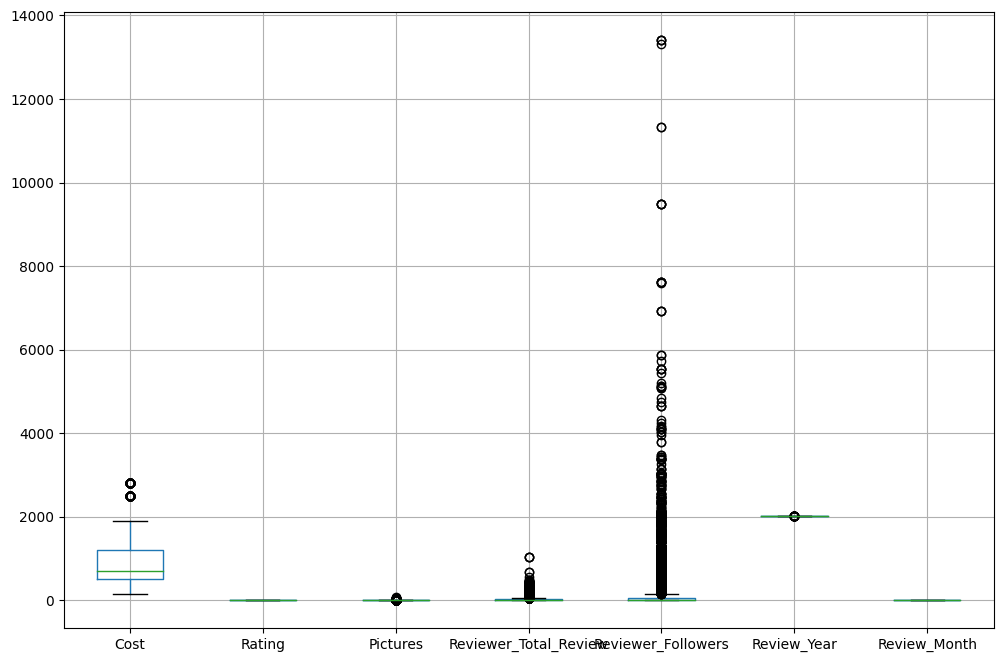

In [57]:
# Handling Outliers & Outlier treatments
plt.figure(figsize=(12,8))
merged.boxplot()

In [58]:
merged.describe()

,Cost,Rating,Pictures,Reviewer_Total_Review,Reviewer_Followers,Review_Year,Review_Month
count,9962.000000,9962.000000,9962.000000,9962.000000,9962.000000,9962.000000,9962.000000
mean,871.531821,3.601084,0.751456,23.990865,162.994178,2018.452118,6.017868
std,503.427308,1.483392,2.574863,50.615027,619.950232,0.562494,3.159464
min,150.000000,1.000000,0.000000,0.000000,0.000000,2016.000000,1.000000
25%,500.000000,3.000000,0.000000,1.000000,1.000000,2018.000000,4.000000
50%,700.000000,4.000000,0.000000,4.000000,7.000000,2018.000000,5.000000
75%,1200.000000,5.000000,0.000000,22.000000,63.000000,2019.000000,8.000000
max,2800.000000,5.000000,64.000000,1031.000000,13410.000000,2019.000000,12.000000


As we can see from the above analysis Reviewer Followers and Reviewer total reviews have a lot of outliers present.In Cost, there are also 2 outliers are present.
From the stastical context, we can say that there is huge difference is present between max and 75% that signifies the presence of outliers.

In [59]:
# Handling Outliers & Outlier treatments
outlier_cols=['Cost','Reviewer_Total_Review','Reviewer_Followers']
def clip_outliers(hotel_df):
    for col in hotel_df[outlier_cols]:
        # using IQR method to define range of upper and lower limit.
        q1 = hotel_df[col].quantile(0.25)
        q3 = hotel_df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        # replacing the outliers with upper and lower bound
        hotel_df[col] = hotel_df[col].clip(lower_bound, upper_bound)
    return hotel_df

In [60]:
# using the function to treat outliers
merged = clip_outliers(merged)

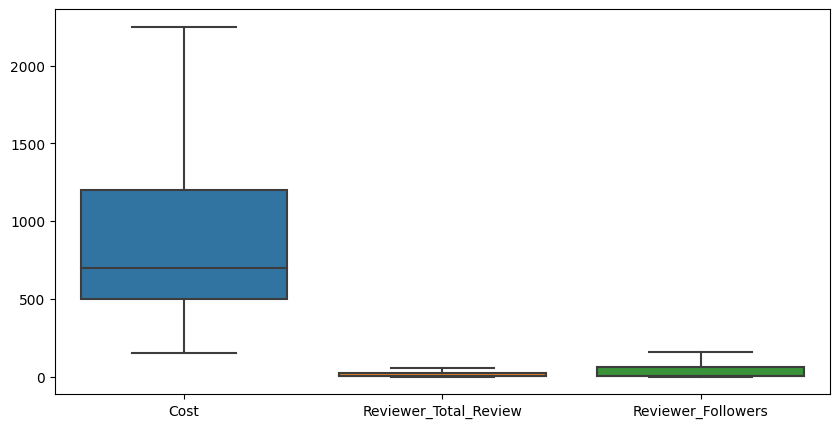

In [61]:
#BoxPlot after clipping outliers
plt.figure(figsize=(10,5))
sns.boxplot(data=merged[outlier_cols])
plt.show()

##### What all outlier treatment techniques have you used and why did you use those techniques?

We have implemented clipping method. In this method, we set a cap on our outliers data, which means that if a value is higher than or lower than a certain threshold, all values will be considered outliers. This method replaces values that fall outside of a specified range with either the minimum or maximum value within that range. Here we have set the threshold of .25-1.5IQR(Lower limit) and .75+1.5IQR(Upper limit).

### 3. Categorical Encoding

In [62]:
# Encode your categorical columns
#create a data frame cuisine
cuisine_df=hotel_cpy[['Restaurant','Cuisines']]

#Splitting the cuisine column
cuisine_df['Cuisines']=cuisine_df.Cuisines.apply(lambda x:str(x).split(', '))

#explode the cuisines column to generate seperate value for each cuisine
cuisine_df=cuisine_df.explode('Cuisines')

#Dummification of cuisine column
cuisine_df= pd.get_dummies(cuisine_df, columns=["Cuisines"], prefix=["Cuisines"])

#grouping each restaurant as explode created unnecessary rows
cuisine_df = cuisine_df.groupby("Restaurant").sum().reset_index()


my_lambda=lambda x: 1 if x>=1 else 0
cuisine_df = cuisine_df.apply(lambda col: col.map(my_lambda) if col.name != 'Restaurant' else col)

In [63]:
#merge cuisine dataframe with avg hotel rating to remove unrated restaurant
cluster_df=cuisine_df.merge(avg_hotel_rating,on='Restaurant')

In [64]:
cluster_df.shape

(100, 47)

#### What all categorical encoding techniques have you used & why did you use those techniques?

The cuisines column is a text column so first I split and explode that column to find single value of cuisine then dummify that column to convert it in numeric form .
As explode generate duplicate rows so I grouped the rows to avoid dupicacy.
finally I got 100 rows and 43 columns.
After grouping there is sum of cuisine value so I replace the sum with 1.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [65]:
review_df.shape

(9964, 7)

In [66]:
# Expand Contraction
!pip install contractions
import contractions

#Create a new data frame containing columns analazing the review
sentiment_df=review_cpy[['Reviewer','Review','Rating','Restaurant']]

# applying fuction for contracting text
sentiment_df['Review']=sentiment_df['Review'].apply(lambda x:contractions.fix(str(x)))

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 7.1 MB/s eta 0:00:00


#### 2. Lower Casing

In [67]:
# Lower Casing
sentiment_df['Review']=sentiment_df['Review'].str.lower()

#### 3. Removing Punctuations

In [68]:
# Remove Punctuations
#function to Remove Punctuations
import string
def remove_punctuation(text):
  '''a function for removing punctuation'''

  # replacing the punctuations with no space,
  # which in effect deletes the punctuation marks
  translator = str.maketrans('', '', string.punctuation)
  # return the text stripped of punctuation marks
  return text.translate(translator)

In [69]:
#remove punctuation using function created
sentiment_df['Review'] = sentiment_df['Review'].apply(remove_punctuation)
sentiment_df.sample(5)

,Reviewer,Review,Rating,Restaurant
4922,Ramu,staff is very reckless and they are least both...,1.0,Mathura Vilas
964,Klakshmi Santhoshi,best ever ice cream i have ever had for the la...,5.0,Cream Stone
2869,Sudhir,one of the worst biryanis i ever had by paying...,1.0,Behrouz Biryani
6923,Subhasis Saha,went for buffet too much spices on the barbecu...,3.0,The Indi Grill
2091,Mukesh Gain,ordered butter naan completely jalgayaaa and v...,2.0,13 Dhaba


#### 4. Removing URLs & Removing words and digits contain digits.

In [70]:
# Remove URLs & Remove words and digits contain
# Remove URLs & Remove words and digits contain digits
import re

# Remove links
sentiment_df["Review"] = sentiment_df["Review"].apply(lambda x: re.sub(r"http\S+", "", x))

# Remove digits
sentiment_df["Review"] = sentiment_df["Review"].apply(lambda x: re.sub(r"\d+", "", x))

#### 5. Removing Stopwords & Removing White spaces

In [71]:
# Remove Stopwords
# extracting the stopwords from nltk library
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
sw = stopwords.words('english')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [72]:
#function to remove stopwords
def delete_stopwords(text):
  '''a function for removing the stopword'''
  # removing the stop words and lowercasing the selected words
  text = [word.lower() for word in text.split() if word.lower() not in sw]
  # joining the list of words with space separator
  return " ".join(text)

In [73]:
#calling function to remove stopwords
sentiment_df['Review'] = sentiment_df['Review'].apply(delete_stopwords)

In [74]:
# Remove White spaces
sentiment_df['Review'] =sentiment_df['Review'].apply(lambda x: " ".join(x.split()))

In [75]:
sentiment_df['Review'][1]

'ambience good pleasant evening service prompt food good good experience soumen das kudos service'

#### 6. Rephrase Text

Not using

In [76]:
# Rephrase Text
from nltk.corpus import wordnet

#function to create rephrase sentence
def rephrase_sentence(sentence):
     # Tokenize the sentence
     tokens = nltk.word_tokenize(sentence)

     # Replace each token with its synonyms
     new_sentence = []
     for token in tokens:
         synonyms = wordnet.synsets(token)
         if synonyms:
             new_sentence.append(synonyms[0].lemmas()[0].name())
         else:
             new_sentence.append(token)

     # Join the tokens back into a sentence
     rephrased_sentence = " ".join(new_sentence)

     return rephrased_sentence

 # apply the function to the 'Review' column
sentiment_df['Review'] = sentiment_df['Review'].apply(rephrase_sentence)


In [77]:
review_df['Review'][0]

'The ambience was good, food was quite good . had Saturday lunch , which was cost effective .\nGood place for a sate brunch. One can also chill with friends and or parents.\nWaiter Soumen Das was really courteous and helpful.'

In [78]:
sentiment_df['Review'][0]

'atmosphere good food quite good Saturday lunch cost effective good topographic_point satiate brunch one besides chill friend parent waiter soumen hyrax truly courteous helpful'

#### 7. Tokenization

In [79]:
# Tokenization
sentiment_df['Review'] = sentiment_df['Review'].apply(nltk.word_tokenize)

In [80]:
sentiment_df['Review'][0]

['atmosphere',
 'good',
 'food',
 'quite',
 'good',
 'Saturday',
 'lunch',
 'cost',
 'effective',
 'good',
 'topographic_point',
 'satiate',
 'brunch',
 'one',
 'besides',
 'chill',
 'friend',
 'parent',
 'waiter',
 'soumen',
 'hyrax',
 'truly',
 'courteous',
 'helpful']

#### 8. Text Normalization

In [81]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
#applying Lemmatization
from nltk.stem import WordNetLemmatizer

# Create a lemmatizer
lemmatizer = WordNetLemmatizer()

def lemmatize_tokens(tokens):
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized_tokens

# Lemmatize the 'Review' column
sentiment_df['Review'] = sentiment_df['Review'].apply(lemmatize_tokens)

##### Which text normalization technique have you used and why?

I have used Stemming technique.It refers to the process of reducing a word to its word stem that affixes to suffixes and prefixes or the roots. While a stemming algorithm is a linguistic normalization process in which the variant forms of a word are reduced to a standard form.
Stemming follows an algorithm with steps to perform on the words which makes it faster. Whereas, in lemmatization, you used a corpus also to supply lemma which makes it slower than stemming.

#### 9. Part of speech tagging

Not Required

In [82]:
# POS Tagging
#sentiment_df['Review'] = sentiment_df['Review'].apply(nltk.pos_tag)
#sentiment_df.Review

Part-of-speech (POS) tagging can be important for sentiment analysis in some cases, as it can provide additional information about the structure and meaning of the text.

For example, certain POS tags, such as adjectives and adverbs, are often used to express sentiment. By identifying these POS tags in the text, a sentiment analysis model can gain a better understanding of the sentiment being expressed. Additionally, certain grammatical structures, such as negations or modals, can change the sentiment of a sentence. By identifying these structures through POS tagging, a sentiment analysis model can take them into account when determining the overall sentiment of the text.
But in this project I am not not implementing this section as not giving expected result.

In [83]:
sentiment_df.Review[0]

['atmosphere',
 'good',
 'food',
 'quite',
 'good',
 'Saturday',
 'lunch',
 'cost',
 'effective',
 'good',
 'topographic_point',
 'satiate',
 'brunch',
 'one',
 'besides',
 'chill',
 'friend',
 'parent',
 'waiter',
 'soumen',
 'hyrax',
 'truly',
 'courteous',
 'helpful']

#### 10. Text Vectorization

In [84]:
# Vectorizing Text
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(tokenizer=lambda x: x, lowercase=False)
vectorizer.fit(sentiment_df['Review'].values)

#creating independent variable for sentiment analysis
X_tfidf = vectorizer.transform(sentiment_df['Review'].values)

In [85]:
X_tfidf.shape

(9962, 15342)

##### Which text vectorization technique have you used and why?

Here I have used Tf-idf Vectorization technique.

TF-IDF (term frequency-inverse document frequency) is a technique that assigns a weight to each word in a document. It is calculated as the product of the term frequency (tf) and the inverse document frequency (idf).

The term frequency (tf) is the number of times a word appears in a document, while the inverse document frequency (idf) is a measure of how rare a word is across all documents in a collection. The intuition behind tf-idf is that words that appear frequently in a document but not in many documents across the collection are more informative and thus should be given more weight.

The mathematical formula for tf-idf is as follows:

tf-idf(t, d, D) = tf(t, d) * idf(t, D)

where t is a term (word), d is a document, D is a collection of documents, tf(t, d) is the term frequency of t in d, and idf(t, D) is the inverse document frequency of t in D.

The tf component of the weight assigns a value to a word based on how often it appears in the document, while the idf component assigns a value based on how rare the word is in the entire collection of documents. Tf-idf is commonly used in text classification and information retrieval tasks because it can help to down-weight the effect of common words and up-weight the effect of rare words which are more informative.

It also helps to reduce the dimensionality of the data and increases the weight of important words, thus providing more informative and robust feature set for the model to work on.

Text vectorization is the process of converting text data into numerical vectors that can be used as input for machine learning models.

There are several ways to vectorize text data, one of the most common methods is using Tf-idf Vectorization, other methods are bag-of-words (BoW - uses CountVectorizer), word2vec, or doc2vec model.



### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [86]:
# Manipulate Features to minimize feature correlation and create new features

#Create Total Cuisine Count column based on length of cuisine list
hotel_cpy['Total_Cuisine_Count'] = hotel_cpy['Cuisines'].apply(lambda x : len(str(x).split(', ')))
cluster_df=cluster_df.merge(hotel_cpy[['Restaurant','Total_Cuisine_Count']],how="inner",on='Restaurant')

#Find a new column city  fetch from links column
hotel_cpy['Links']=hotel_cpy.Links.apply(lambda x:x.split('/'))
hotel_cpy['city']=hotel_cpy.Links.apply(lambda x: x[3])
hotel_cpy.city.value_counts()

#create a new column in review data set based on rating column
m=sentiment_df.Rating.mean()
sentiment_df['Sentiment']=sentiment_df['Rating'].apply(lambda x: 1 if x>=m else 0)

In [87]:
cluster_df.shape

(100, 48)

I have generated two new columns Total Cuisine count column to find number of cuisines offered by particular restaurant and other one is city column fetched from links column but we can see that all the restaurants are located in Hyderabad except 1.
I have created one new column in the sentiment dataset i.e. Sentiment in which if the rating given by the user is above the avg rating of the whole dataset then its sentiment is 1(positive) otherwise 0(negative).

#### 2. Feature Selection

In [88]:
# Select your features wisely to avoid overfitting

#Dropping city,Links,Cost_bins columns
hotel_cpy.drop(['city','Links','Cost_bins'],axis=1,inplace=True)

##### What all feature selection methods have you used  and why?

I have dropped city,links and cost bins columns from hotel dataset as these are not useful for further analysis.

##### Which all features you found important and why?

I have chosen those features that help in clustering the restaurant like cuisine,rating,cost per person and total cuisines count.




### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [89]:
# Transform Your data
# Getting symmetric and skew symmetric features
symmetric_feature=[]
non_symmetric_feature=[]
for i in cluster_df[['Cost','Rating','Total_Cuisine_Count']]:
  if abs(cluster_df[i].mean()-cluster_df[i].median())<0.1:
    symmetric_feature.append(i)
  else:
    non_symmetric_feature.append(i)

# Getting Symmetric Distributed Features
print("Symmetric Distributed Features : -",symmetric_feature)

# Getting Skew Symmetric Distributed Features
print("Skew Symmetric Distributed Features : -",non_symmetric_feature)

Symmetric Distributed Features : - ['Rating', 'Total_Cuisine_Count']
Skew Symmetric Distributed Features : - ['Cost']


As we can see that only Cost column is skew symmetric so I will apply transformation technique on it to make it normalize.

In [90]:
#Applying Log transformation on Cost column
cluster_df['Cost']=np.log1p(cluster_df['Cost'])

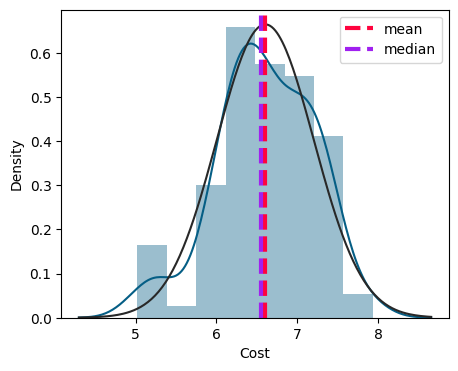

In [91]:
#Plot the Cost column after logarithm transformation
plt.figure(figsize = (5,4));
sns.distplot(cluster_df['Cost'], color = '#055E85', fit = norm)
plt.axvline(cluster_df['Cost'].mean(), color='#ff033e', linestyle='dashed', linewidth=3,label= 'mean');  #red
plt.axvline(cluster_df['Cost'].median(), color='#A020F0', linestyle='dashed', linewidth=3,label='median'); #cyan
plt.legend(bbox_to_anchor = (1.0, 1))

After applying log transformation on cost column the feature is following normal distribution.

### 6. Data Scaling

In [92]:
# Scaling your data
cluster_df.head(3)

,Restaurant,Cuisines_American,Cuisines_Andhra,Cuisines_Arabian,Cuisines_Asian,Cuisines_BBQ,Cuisines_Bakery,Cuisines_Beverages,Cuisines_Biryani,Cuisines_Burger,...,Cuisines_Seafood,Cuisines_South Indian,Cuisines_Spanish,Cuisines_Street Food,Cuisines_Sushi,Cuisines_Thai,Cuisines_Wraps,Rating,Cost,Total_Cuisine_Count
0,10 Downing Street,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3.8,7.550135,3
1,13 Dhaba,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3.5,6.111467,1
2,"3B's - Buddies, Bar & Barbecue",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4.8,7.003974,3


As can be seen that Rating,Cost,Total_Cuisine_Count are following symmetric normal distribution but not scaled.

In [93]:
from sklearn.preprocessing import StandardScaler
#List of features to be scaled
scaled=['Rating','Cost','Total_Cuisine_Count']
scaler=StandardScaler()
scaled_df=pd.DataFrame(scaler.fit_transform(cluster_df[scaled]),columns=scaled)

In [94]:
#Dropping unscaled features from the cluster data frame
cluster_cpy=cluster_df.copy()
cluster_cpy.drop(['Rating','Cost','Total_Cuisine_Count'],axis=1,inplace=True)
cluster_cpy=pd.concat([cluster_cpy,scaled_df],axis=1)

##### Which method have you used to scale you data and why?

As the data is noramlly distributed so I implemented Standard Scaling.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Yes, it is important to use dimensionality reduction techniques as dataset has 40 or more features. This is because, as the number of features increases, the computational cost of clustering algorithms also increases. In addition, high dimensionality can lead to the "curse of dimensionality", where the data becomes sparse and the clusters become harder to identify. Dimensionality reduction techniques such as PCA, t-SNE, or LLE can help reduce the number of features while maintaining the important information in the data, making it easier to cluster and interpret the results.

In [95]:
# DImensionality Reduction (If needed)
#import PCA
from sklearn.decomposition import PCA

#generating PCA object
pca=PCA()

#fittting the dataframe
cluster_cpy.set_index(['Restaurant'],inplace=True)
pca.fit(cluster_cpy)

PCA()

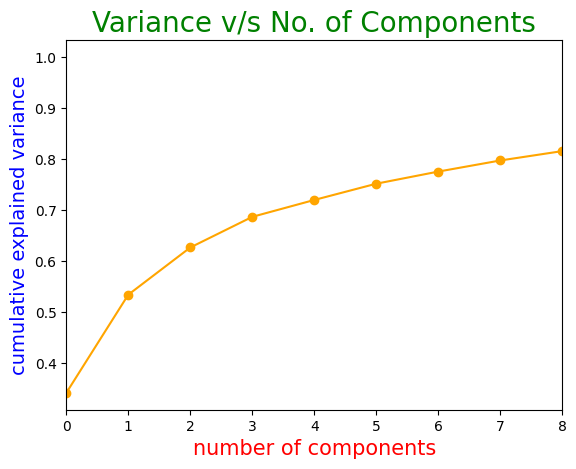

In [96]:
#explained variance v/s no. of components
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker ='o', color = 'orange')
plt.xlabel('number of components',size = 15, color = 'red')
plt.ylabel('cumulative explained variance',size = 14, color = 'blue')
plt.title('Variance v/s No. of Components',size = 20, color = 'green')
plt.xlim([0, 8])
plt.show()

As can be seen that when number of components is 3 it can explain > 60% varaiance.

In [97]:
pca=PCA(n_components=3)
pca.fit(cluster_cpy)
print(pca.explained_variance_ratio_)
print("Total variance expalained :",np.sum(pca.explained_variance_ratio_))
trans_df=pca.transform(cluster_cpy)

[0.34225518 0.19227416 0.09243124]
Total variance expalained : 0.6269605769258341


In [98]:
trans_df.shape

(100, 3)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

I have used PCA as dimensionality reduction technique because PCA (Principal Component Analysis) is a widely used dimensionality reduction technique because it is able to identify patterns in the data that are responsible for the most variation. These patterns, known as principal components, are linear combinations of the original features that are uncorrelated with each other. By using the first few principal components, which account for the majority of the variation in the data, one can effectively reduce the dimensionality of the data while maintaining most of the important information.

Another advantage of PCA is that it is a linear technique, which means it can be applied to data that have a linear relationship between features. It is also easy to interpret the results as the principal components can be thought of as new, uncorrelated features. Additionally, PCA can be used for data visualization by projecting high-dimensional data onto a 2D or 3D space for easy visualization.

When PCA is applied before k-means, it is used to reduce the dimensionality of the data by transforming the original feature space into a new feature space of uncorrelated principal components. The k-means algorithm is then applied to the transformed data, resulting in clusters that are defined in the new feature space. The advantage of this approach is that it can help to remove noise and correlated features from the data, which can make the clustering results more interpretable. However, it also means that the clusters may be harder to interpret in the original feature space.

When PCA is applied after k-means, it is used to visualize the clusters in a lower-dimensional space. The k-means algorithm is applied to the original data, resulting in clusters that are defined in the original feature space. PCA is then used to project the data into a lower-dimensional space, making it easier to visualize and interpret the clusters. The advantage of this approach is that the clusters can be easily interpreted in the original feature space. However, it may not be as effective in removing noise and correlated features from the data.



### 8. Data Splitting

In [99]:
# Split your data to train and test. Choose Splitting ratio wisely.
X=X_tfidf
y=sentiment_df['Sentiment']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [100]:
sentiment_df.shape

(9962, 5)

In [101]:
print("X_train:",X_train.shape)
print("Y_train:",y_train.shape)
print("X_test:",X_test.shape)
print("Y_test:",y_test.shape)

X_train: (7969, 15342)
Y_train: (7969,)
X_test: (1993, 15342)
Y_test: (1993,)


##### What data splitting ratio have you used and why?

I have used 80:20 split which is one the most used split ratio. Since there was only 9961 data, therefore I have used more in training set.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

In [ ]:
#getting the value count for target class
vc = sentiment_df.Sentiment.value_counts().reset_index().rename(columns =
            {'index':'Sentiment','Sentiment':'Count'})

#defining majority and minority class value
majority_class = vc.Count[0]
minority_class = vc.Count[1]

#calculating cir value for checking class imbalance
CIR = majority_class / minority_class
CIR


In [ ]:
# Dependant Variable Column Visualization
sentiment_df['Sentiment'].value_counts().plot(kind='pie',
                              figsize=(15,6),
                               autopct="%1.1f%%",
                               startangle=90,
                               shadow=True,
                               labels=['Positive Sentiment','Negative Sentiment'],
                               colors=['red','blue'],
                               explode=[0.01,0.02]
                              )
plt.show()

The data is imbalanced as can be seen from the above chart. Here 63% are the postive sentiment while 37% for negavtive sentiment.

There is imbalance in dataset with 60: 40 ratio, where 60 is the majaority class and 40 is the minority class. Even the CIR score suggest that majority class is 1.73 times greater than minority class. However it is considered as slight imbalance, therefore not performing any under or over sampling technique i.e., not required to treat class imabalance.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1 KMeans

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Assuming data is your dataset
wcss = []

# Range of cluster numbers to test
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(trans_df)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 4))
plt.plot(k_range, wcss, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k')
plt.grid()
plt.show()


In [ ]:
# ML Model - 1 Implementation
#importing kmeans
from sklearn.cluster import KMeans

# Fit the Algorithm
inertia=[]
for i in range(1,10):
  kmeans=KMeans(n_clusters=i)
  kmeans.fit(trans_df)
  inertia.append(kmeans.inertia_)


In [ ]:
sns.lineplot(y=inertia,x=range(1,10),marker='o',linestyle='-')
plt.grid()
plt.show()

In [ ]:
from matplotlib.colors import ListedColormap
import matplotlib.cm as cm

In [ ]:
#silhouette score
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn.model_selection import ParameterGrid
# candidates for the number of cluster
parameters = list(range(2,10))
#parameters
parameter_grid = ParameterGrid({'n_clusters': parameters})
best_score = -1
#visualizing Silhouette Score for individual clusters and the clusters made
for n_clusters in parameters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # 1st subplot is the silhouette plot
    # silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(trans_df) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(trans_df)

    # silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(trans_df, cluster_labels)
    print("For n_clusters =", n_clusters,
          "average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(trans_df, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("silhouette plot for the various clusters.")
    ax1.set_xlabel("silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(trans_df[:, 0], trans_df[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')
    #marker='' % i will give numer in cluster in 2 plot
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

In [ ]:
#vizualizing the clusters and the datapoints in each clusters
plt.figure(figsize = (10,6), dpi = 120)

kmeans= KMeans(n_clusters = 6, init= 'k-means++', random_state = 42)
kmeans.fit(trans_df)

#predict the labels of clusters.
label = kmeans.fit_predict(trans_df)
#Getting unique labels
unique_labels = np.unique(label)

#plotting the results:
for i in unique_labels:
    plt.scatter(trans_df[label == i , 0] , trans_df[label == i , 1] , label = i)
plt.legend()
plt.show()

In [ ]:
#Creating a new column Label and assign cluster labels to it
cluster_df['Label']=label

In [ ]:
#changing back cost value to original from log1p done during transformation
cluster_df['Cost'] = np.expm1(cluster_df['Cost'])

#Merging the cluster data frame with the hotel to add relevalent columns
cluster_df=cluster_df[['Restaurant','Cost','Rating','Total_Cuisine_Count','Label']].merge(hotel_cpy[['Restaurant','Cuisines']],on='Restaurant')
cluster_df.head(3)

In [ ]:
#find the number of restaurants in each cluster
cluster_df.groupby('Label')['Restaurant'].count().sort_values().reset_index()

In [ ]:
#Find the cuisines for each cluster
#create a copy of cluster data frame and seperate rows for each cuisine
new_cluster_df=cluster_df.copy()
new_cluster_df['Cuisines']=cluster_df.Cuisines.str.split(',')
new_cluster_df=new_cluster_df.explode('Cuisines',ignore_index=True)

In [ ]:
#group cluster by label and find list of cuisines
grouped_cluster=new_cluster_df.groupby('Label')
for label,group in grouped_cluster:
  print(f'Cuisines for cluster {label}')
  print(group['Cuisines'].tolist())
  print()

Agglomerative Hierarchical Clustering
Hierarchial clustering algorithms group similar objects into groups called clusters. There are two types of hierarchical clustering algorithms:

Agglomerative — Bottom up approach. Start with many small clusters and merge them together to create bigger clusters. Divisive — Top down approach. Start with a single cluster than break it up into smaller clusters.

Agglomerative hierarchical clustering

The agglomerative hierarchical clustering algorithm is a popular example of HCA. To group the datasets into clusters, it follows the bottom-up approach. It means, this algorithm considers each dataset as a single cluster at the beginning, and then start combining the closest pair of clusters together. It does this until all the clusters are merged into a single cluster that contains all the datasets. This hierarchy of clusters is represented in the form of the dendrogram.

Dendrogram in Hierarchical clustering

The dendrogram is a tree-like structure that is mainly used to store each step as a memory that the HC algorithm performs. In the dendrogram plot, the Y-axis shows the Euclidean distances between the data points, and the x-axis shows all the data points of the given dataset.



In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
# Perform hierarchical clustering
linked = linkage(trans_df, 'ward')

# Create a dendrogram
plt.figure(figsize=(10, 5))
dendrogram(linked, orientation='top', labels=range(1, len(trans_df) + 1), distance_sort='descending', show_leaf_counts=True)

plt.title('Dendrogram')
plt.xlabel('Restaurants')
plt.ylabel('Distance')
plt.show()

In [ ]:
#Checking the Silhouette score for 15 clusters
from sklearn.cluster import AgglomerativeClustering

range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    hc = AgglomerativeClustering(n_clusters = n_clusters, affinity = 'euclidean', linkage = 'ward')
    y_hc = hc.fit_predict(trans_df)
    score = silhouette_score(trans_df, y_hc)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

In [ ]:
# agglomerative clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification

# define the model
model = AgglomerativeClustering(n_clusters = 6)      #n_clusters=6
# fit model and predict clusters
y_hc = model.fit_predict(trans_df)
# retrieve unique clusters
clusters = unique(y_hc)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(y_hc == cluster)
	# create scatter of these samples
	plt.scatter(trans_df[row_ix, 0], trans_df[row_ix, 1])
# show the plot
plt.show()
#Evaluation

#Silhouette Coefficient
print("Silhouette Coefficient: %0.3f"%silhouette_score(trans_df,y_hc, metric='euclidean'))

#davies_bouldin_score of our clusters
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(trans_df, y_hc)
print("davies_bouldin_score %0.3f"%davies_bouldin_score(trans_df, y_hc))

In [ ]:
#creating new colummn for predicting cluster using hierarcial clsutering
cluster_df['Label_hr'] = y_hc

In [ ]:
cluster_df.head()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

KMeans Clustering

I applied K means Clustering to cluster the Restaurants based on the given features. I used both the Elbow and Silhuoette Methods to get an efficient number of K, and we discovered that n clusters = 6 was best for our model. The model was then fitted using K means, and each data point was labelled with the cluster to which it belonged using K means.labels. After labelling the clusters, we visualised them and counted the number of restaurants in each cluster, discovering that the majority of the restaurants belonged to the fourth cluster.

Agglomerative Hierarchical Clustering

I have used Hierarchial Clustering - Agglomerative Model to cluster the restaurants based on different features. This model uses a down-top approach to cluster the data. I have used Silhouette Coefficient Score and used clusters = 6 and then vizualized the clusters and the datapoints within it.



In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

Not Needed

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2 Unsupervised Sentiment Analysis using LDA

####Unsupervised Sentiment Analysis Using LDA

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.metrics import silhouette_score
silhouette_scores = []
for n_components in range(2,11):
    lda = LatentDirichletAllocation (n_components=n_components)
    lda.fit(X)
    labels = lda.transform(X).argmax(axis=1)
    silhouette_scores.append(silhouette_score(X, labels))

In [ ]:
#plotting silhouette score
plt.plot(range(2,11), silhouette_scores, marker ='o', color='red')
plt.xlabel('Number of Topics', size = 15, color = 'green')
plt.ylabel('Silhouette Score', size = 15, color = 'blue')
plt.grid()
plt.show()

In [ ]:
# LDA model
lda = LatentDirichletAllocation(n_components=3)
lda.fit(X)

In [ ]:
#creating copy to store predicted sentiments
review_sentiment_prediction = review_cpy[['Restaurant','Reviewer','Review','Rating','Metadata','Time','Pictures']].copy()
review_sentiment_prediction.head()

In [ ]:
# predicting the sentiments and storing in a feature
topic_results = lda.transform(X)
review_sentiment_prediction['Prediction'] = topic_results.argmax(axis=1)
review_sentiment_prediction.sample(5)

In [ ]:
#worcloud
# Define the number of words to include in the word cloud
N = 100

# Create a list of strings for each topic
topic_text = []
for index, topic in enumerate(lda.components_):
    topic_words = [vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-N:]]
    topic_text.append(" ".join(topic_words))

# Create a word cloud for each topic
for i in range(len(topic_text)):
    print(f'TOP 100 WORDS FOR TOPIC #{i}')
    wordcloud = WordCloud(background_color="black",colormap='rainbow').generate(topic_text[i])
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    print('='*120)

In [ ]:
#Find the number of reviews under each topic
review_sentiment_prediction.Prediction.value_counts()

Here we can see that there are maximum number of reviews under topic 3 and minimum number of reviews under the second topic.

In [ ]:
#Count the number of restaurants categorized based on topics and rating.
grouped_df=review_sentiment_prediction.groupby(['Prediction', 'Rating'])['Restaurant'].count().reset_index().sort_values(by=['Prediction', 'Rating'])
# Iterate through groups and print data with separators
for name, group in grouped_df.groupby('Prediction'):
    print(f'Topic: {name}')
    print(group)
    print('-' * 40)  # Print a separator line

LDA is an unsupervised learning algorithm, it doesn't have any predefined labels. The labels are assigned based on the analysis done on the words, the weights of the words, and the context of the words in each topic.
So, the predicted topic is not a definite answer, therfore experimenting with different techniques like using supervised algorithm and combining the results to make a more accurate sentiment labeling.

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3 Supervised Sentiment Analysis

In [102]:
#defining function to calculate score
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score,precision_score,recall_score,confusion_matrix
from tabulate import tabulate
import itertools
#calculating score
def calculate_scores(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    roc_auc = roc_auc_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    # Get the confusion matrix for both train and test

    cm = confusion_matrix(y_test, y_pred)
    plt.imshow(cm, cmap='Wistia')

    # Add labels to the plot
    class_names = ["Positive", "Negative"]
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)

    # Add values inside the confusion matrix
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")

    # Add a title and x and y labels
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')

    plt.show()
    print(cm)
    return roc_auc, f1, accuracy, precision, recall

    #printing result
def print_table(model, X_train, y_train, X_test, y_test):
    roc_auc, f1, accuracy, precision, recall = calculate_scores(model, X_train, y_train, X_test, y_test)
    table = [["ROC AUC", roc_auc], ["Precision", precision],
             ["Recall", recall], ["F1", f1], ["Accuracy", accuracy]]
    print(tabulate(table, headers=["Metric", "Score"]))

In [103]:
# ML Model - 3 Implementation
#logiistic regression
from sklearn.linear_model import LogisticRegression
# create the model
clf = LogisticRegression()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

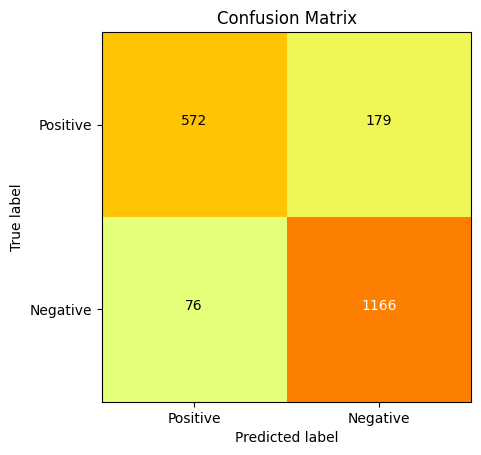

[[ 572  179]
 [  76 1166]]
Metric        Score
---------  --------
ROC AUC    0.85023
Precision  0.866914
Recall     0.938808
F1         0.90143
Accuracy   0.872052


In [104]:
# Visualizing evaluation Metric Score chart
print_table(clf, X_train, y_train, X_test, y_test)

The first row of the matrix represents the predicted positive class (1) and the second row represents the predicted negative class (0). The first column represents the actual positive class (1) and the second column represents the actual negative class (0).

558 instances are labeled as True Positive (correctly predicted as positive)
162 instances are labeled as False Positive (incorrectly predicted as positive)
1195 instances are labeled as True Negative (correctly predicted as negative)
78 instances are labeled as False Negative (incorrectly predicted as negative)

#### 2. Cross- Validation & Hyperparameter Tuning

Fitting 5 folds for each of 20 candidates, totalling 100 fits


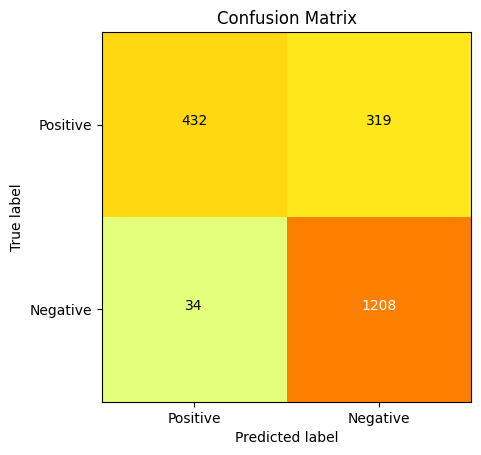

[[ 432  319]
 [  34 1208]]
Metric        Score
---------  --------
ROC AUC    0.773929
Precision  0.791094
Recall     0.972625
F1         0.872517
Accuracy   0.82288


In [105]:
# ML Model - 4 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# finding the best parameters for LogisticRegression by gridsearchcv
from sklearn.model_selection import GridSearchCV
param_dict = {'C': [0.1,1,10,100,1000],'penalty': ['l1', 'l2'],'max_iter':[1000,10000]}
clf_grid = GridSearchCV(clf, param_dict,n_jobs=-1, cv=5, verbose = 5,scoring='recall')
# Fit the Algorithm
# Predict on the model
# printing result
print_table(clf_grid, X_train, y_train, X_test, y_test)

In [106]:
clf_grid.best_estimator_

LogisticRegression(C=0.1, max_iter=1000)

The first row of the matrix represents the predicted positive class (1) and the second row represents the predicted negative class (0). The first column represents the actual positive class (1) and the second column represents the actual negative class (0).

442 instances are labeled as True Positive (correctly predicted as positive)
278 instances are labeled as False Positive (incorrectly predicted as positive)
1240 instances are labeled as True Negative (correctly predicted as negative)
33 instances are labeled as False Negative (incorrectly predicted as negative)

##### Which hyperparameter optimization technique have you used and why?

I have used Grid Search Cv as an optimization technique for finding the optimal hyperparameters to increase the model performance.our goal should be to find the best hyperparameters values to get the perfect prediction results from our model. But the question arises, how to find these best sets of hyperparameters? One can try the Manual Search method, by using the hit and trial process and can find the best hyperparameters which would take huge time to build a single model.

For this reason, methods like Random Search, GridSearch were introduced. Grid Search uses a different combination of all the specified hyperparameters and their values and calculates the performance for each combination and selects the best value for the hyperparameters. This makes the processing time-consuming and expensive based on the number of hyperparameters involved.

In GridSearchCV, along with Grid Search, cross-validation is also performed. Cross-Validation is used while training the model.

That's why I have used GridsearCV method for hyperparameter optimization.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

There is no improvement using Grid Search cv. Only recall score is improved from 93% to 97%.

####XGBClassifier Model

In [107]:
# ML Model - 4 Implementation
#XgBoost
from xgboost import XGBClassifier

#create the model
xgb = XGBClassifier()

##### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

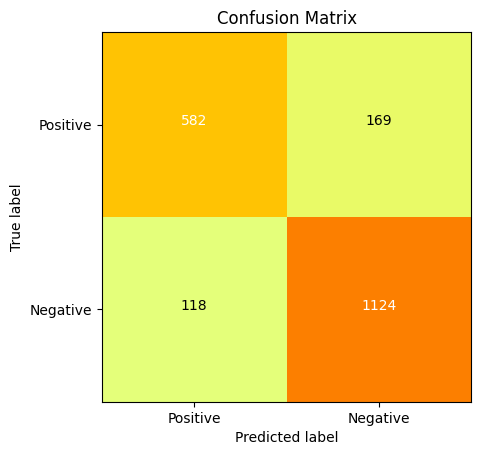

[[ 582  169]
 [ 118 1124]]
Metric        Score
---------  --------
ROC AUC    0.839979
Precision  0.869296
Recall     0.904992
F1         0.886785
Accuracy   0.855996


In [108]:
# Visualizing evaluation Metric Score chart
print_table(xgb, X_train, y_train, X_test, y_test)

The first row of the matrix represents the predicted positive class (1) and the second row represents the predicted negative class (0). The first column represents the actual positive class (1) and the second column represents the actual negative class (0).

565 instances are labeled as True Positive (correctly predicted as positive)
155 instances are labeled as False Positive (incorrectly predicted as positive)
1148 instances are labeled as True Negative (correctly predicted as negative)
125 instances are labeled as False Negative (incorrectly predicted as negative)

#### 2. Cross- Validation & Hyperparameter Tuning

Fitting 3 folds for each of 9 candidates, totalling 27 fits


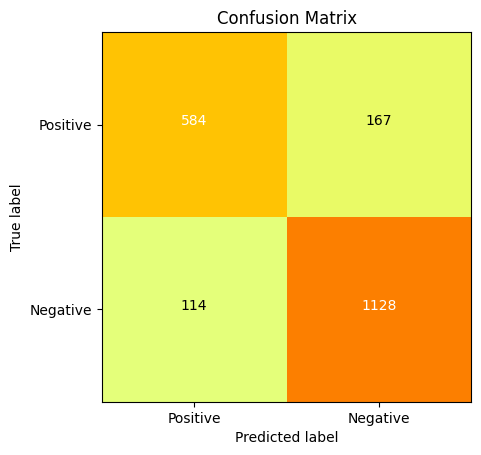

[[ 584  167]
 [ 114 1128]]
Metric        Score
---------  --------
ROC AUC    0.842921
Precision  0.871042
Recall     0.908213
F1         0.889239
Accuracy   0.859007


In [110]:
# ML Model - 5 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# finding the best parameters for xgboost by gridsearchcv
from sklearn.model_selection import GridSearchCV
xgb_param={'n_estimators': [100,125,150],'max_depth': [10,15,20]}
xgb_grid=GridSearchCV(estimator=xgb,param_grid = xgb_param,cv=3,scoring='recall',verbose=5,n_jobs = -1)
# Fit the Algorithm
# Predict on the model
# printing result
print_table(xgb_grid, X_train, y_train, X_test, y_test)

In [ ]:
xgb_grid.best_params_

The first row of the matrix represents the predicted positive class (1) and the second row represents the predicted negative class (0). The first column represents the actual positive class (1) and the second column represents the actual negative class (0).

584 instances are labeled as True Positive (correctly predicted as positive)
167 instances are labeled as False Positive (incorrectly predicted as positive)
1128 instances are labeled as True Negative (correctly predicted as negative)
114 instances are labeled as False Negative (incorrectly predicted as negative)

##### Which hyperparameter optimization technique have you used and why?

I have used Grid Search Cv as an optimization technique for finding the optimal hyperparameters to increase the model performance.our goal should be to find the best hyperparameters values to get the perfect prediction results from our model. But the question arises, how to find these best sets of hyperparameters? One can try the Manual Search method, by using the hit and trial process and can find the best hyperparameters which would take huge time to build a single model.

For this reason, methods like Random Search, GridSearch were introduced. Grid Search uses a different combination of all the specified hyperparameters and their values and calculates the performance for each combination and selects the best value for the hyperparameters. This makes the processing time-consuming and expensive based on the number of hyperparameters involved.

In GridSearchCV, along with Grid Search, cross-validation is also performed. Cross-Validation is used while training the model.

That's why I have used GridsearCV method for hyperparameter optimization.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Metric        Score for XGBoost
---------  --------
ROC AUC    0.839979<BR>
Precision  0.869296<BR>
Recall     0.904992<BR>
F1         0.886785<BR>
Accuracy   0.855996<BR>

Metric        Score for Optimized XGBoost
---------  --------
ROC AUC    0.842921<BR>
Precision  0.871042<BR>
Recall     0.908213<BR>
F1         0.889239<BR>
Accuracy   0.859007

As can be seen that there is an improvement in score after optimising the hyperparameters.



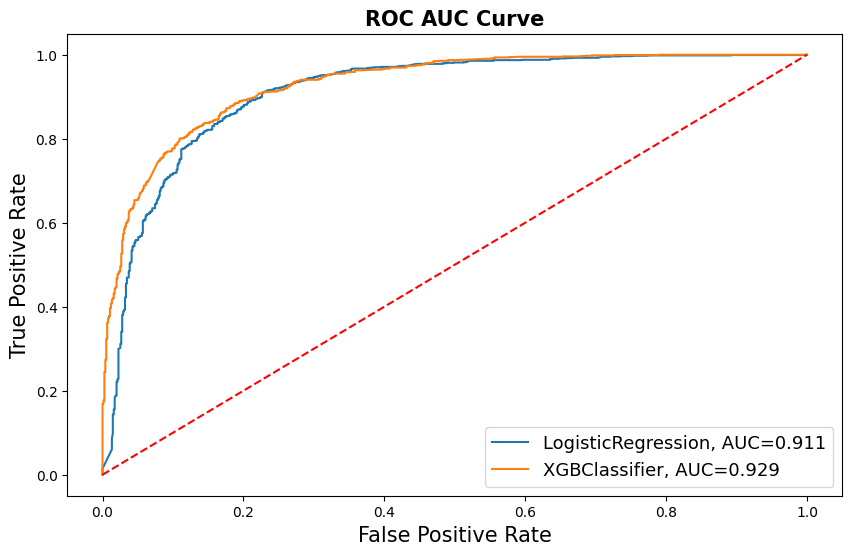

In [113]:
#Plotting graph
from sklearn.metrics import roc_curve
# finding the best parameters for all the models
log_reg_best = clf_grid.best_estimator_
xgbc_best = xgb_grid.best_estimator_

# predicting the sentiment by all models
y_preds_proba_lr = log_reg_best.predict_proba(X_test)[::,1]
y_preds_proba_xgbc = xgbc_best.predict_proba(X_test)[::,1]

classifiers_proba = [(log_reg_best, y_preds_proba_lr),
                    (xgbc_best, y_preds_proba_xgbc)]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for pair in classifiers_proba:

    fpr, tpr, _ = roc_curve(y_test,  pair[1])
    auc = roc_auc_score(y_test, pair[1])

    result_table = result_table.append({'classifiers':pair[0].__class__.__name__,
                                        'fpr':fpr,
                                        'tpr':tpr,
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

# ploting the roc auc curve for all models
fig = plt.figure(figsize=(10,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'],
             result_table.loc[i]['tpr'],
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))

plt.plot([0,1], [0,1],'r--')

plt.xlabel("False Positive Rate", fontsize=15)

plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC AUC Curve', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
print_table(xgb, X_train, y_train, X_test, y_test)

The first row of the matrix represents the predicted positive class (1) and the second row represents the predicted negative class (0). The first column represents the actual positive class (1) and the second column represents the actual negative class (0).

598 instances are labeled as True Positive (correctly predicted as positive)
135 instances are labeled as False Positive (incorrectly predicted as positive)
1147 instances are labeled as True Negative (correctly predicted as negative)
113 instances are labeled as False Negative (incorrectly predicted as negative)

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***